#### 分类-声呐数据集

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

##### K-近邻算法

In [ ]:
df = pd.read_csv('data/分类/sonar.all-data.csv',header=None)

# 提取特征与标签
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
# 标签转换为0/1
from sklearn.preprocessing import LabelEncoder  # 用于标签编码
# 初始化编码器
le = LabelEncoder()
# 拟合并转换标签（将字符映射为整数，如 'M'→1, 'B'→0，具体映射可通过 classes_ 属性查看）
y = le.fit_transform(y)

# （可选）查看编码映射关系，确认转换是否正确
print("标签编码映射：", dict(zip(le.classes_, le.transform(le.classes_))))

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立模型
knn_clf = KNeighborsClassifier(n_neighbors=5)

# 训练模型
knn_clf.fit(X_train, y_train)

# 预测测试集
y_pred = knn_clf.predict(X_test)

# 评估模型
print('不做交叉验证的准确率:',knn_clf.score(X_test, y_test))

# 网格搜索&交叉验证
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1:曼哈顿距离，2:欧氏距离
}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("================================================")
print('最佳参数:',grid_search.best_params_)
print('最佳分数:',grid_search.best_score_)
print('准确率:',grid_search.score(X_test, y_test))

##### 决策树分类

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 加载数据
df = pd.read_csv('data/分类/sonar.all-data.csv', header=None)

# 特征提取
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# 标签转换
le = LabelEncoder()
y = le.fit_transform(y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# 定义模型
dt_clf = DecisionTreeClassifier()

# 定义参数搜索空间
param_grid = {
    'criterion': ['gini', 'entropy'],
   'max_depth': [2, 4, 6, 8, 10, None],
   'min_samples_split': [2, 4, 6, 8, 10],
   'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# 定义网格搜索
grid_search = GridSearchCV(dt_clf, param_grid, cv=5)

# 训练模型
grid_search.fit(X_train, y_train)

# 预测测试集
y_pred = grid_search.predict(X_test)

# 评估模型
print('最佳参数:', grid_search.best_params_)
print('准确率:', accuracy_score(y_test, y_pred))
print('分类报告:\n', classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier  # 改为决策树分类器
from sklearn.metrics import accuracy_score, classification_report

# 加载数据
df = pd.read_csv('data/分类/sonar.all-data.csv', header=None)

# 提取特征与标签
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 标签转换为0/1
le = LabelEncoder()
y = le.fit_transform(y)
print("标签编码映射：", dict(zip(le.classes_, le.transform(le.classes_))))

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立决策树分类模型
dt_clf = DecisionTreeClassifier(random_state=42)

# 训练模型
dt_clf.fit(X_train, y_train)

# 预测测试集
y_pred = dt_clf.predict(X_test)

# 评估模型
print('不做调参的准确率:', accuracy_score(y_test, y_pred))
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 网格搜索&交叉验证
param_grid = {
    'max_depth': [3, 5, 7, 10, None],           # 树的最大深度
    'min_samples_split': [2, 5, 10],            # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 4],              # 叶节点最小样本数
    'criterion': ['gini', 'entropy']            # 分裂标准
}

dt_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("================================================")
print('最佳参数:', grid_search.best_params_)
print('最佳交叉验证准确率:', grid_search.best_score_)
print('测试集准确率:', grid_search.score(X_test, y_test))

# 使用最佳模型
best_dt = grid_search.best_estimator_


##### 支持向量机分类

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC   
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# 加载数据
df = pd.read_csv('data/分类/sonar.all-data.csv', header=None)


# 提取特征与标签
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 标签转换为0/1
le = LabelEncoder()
y = le.fit_transform(y)
print("标签编码映射：", dict(zip(le.classes_, le.transform(le.classes_))))

# 绘制数据分布
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def polySVC(degree, C=1.0):
    return Pipeline(
        [
            ('std',StandardScaler()),
            ('kernelSVC',SVC(kernel='poly',degree=degree,C=C))
        ]
    )

# 网格搜索
param_grid = {
    'kernelSVC__degree': [2,3,4],
    'kernelSVC__C': [0.1,1,10]
}

grid_search = GridSearchCV(estimator=polySVC(degree=2), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 打印最佳参数
print("最佳参数：", grid_search.best_params_)

# 预测与评估
y_pred = grid_search.predict(X_test)
print("准确率：", accuracy_score(y_test, y_pred))
print("分类报告：", classification_report(y_test, y_pred))


##### 逻辑回归

标签编码映射： {'M': 0, 'R': 1}
最佳参数： {'lr__C': 0.1}
最佳分数： 0.7832442067736186
准确率： 0.8333333333333334
分类报告：               precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.71      0.94      0.81        16

    accuracy                           0.83        42
   macro avg       0.83      0.85      0.83        42
weighted avg       0.86      0.83      0.84        42



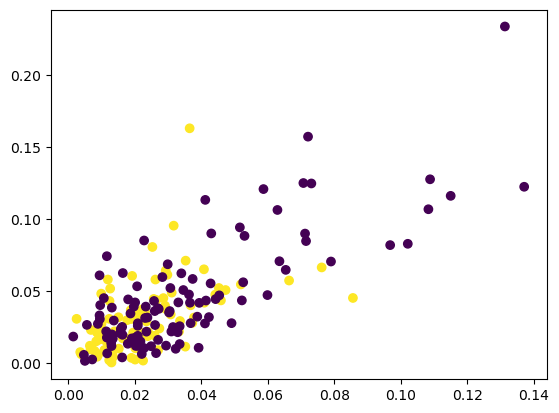

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# 加载数据
df = pd.read_csv('data/分类/sonar.all-data.csv', header=None)


# 提取特征与标签
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 标签转换为0/1
le = LabelEncoder()
y = le.fit_transform(y)
print("标签编码映射：", dict(zip(le.classes_, le.transform(le.classes_))))

# 绘制数据分布
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression())
    ]
)

# 网格搜索
param_grid = {'lr__C': [0.1, 1, 10]}
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("最佳参数：", grid_search.best_params_)
print("最佳分数：", grid_search.best_score_)

# 预测与评估
y_pred = grid_search.predict(X_test)
print("准确率：", accuracy_score(y_test, y_pred))
print("分类报告：", classification_report(y_test, y_pred))

##### 逻辑回归分类练习

标签编码映射： {'M': 0, 'R': 1}
最佳参数： {'clf__C': 0.1}
最佳分数： 0.7832442067736186
准确率： 0.8333333333333334


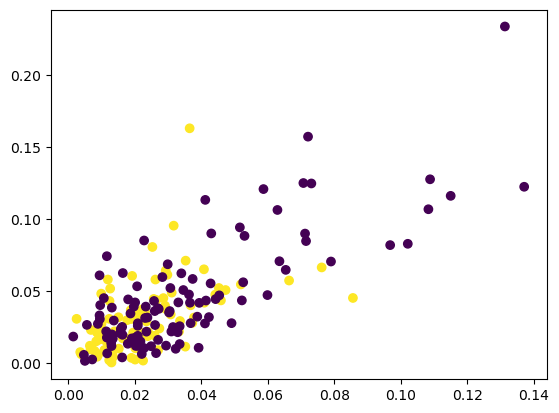

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 加载数据
df = pd.read_csv('data/分类/sonar.all-data.csv', header=None)


# 提取特征与标签
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 标签转换为0/1
le = LabelEncoder()
y = le.fit_transform(y)
print("标签编码映射：", dict(zip(le.classes_, le.transform(le.classes_))))

# 绘制数据分布
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline(
    [
        ('sc', StandardScaler()), 
        ('clf', LogisticRegression(random_state=42))
    ]
)

param_grid = {
    'clf__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("最佳参数：", grid_search.best_params_)
print("最佳分数：", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("准确率：", accuracy_score(y_test, y_pred))


#### 回归-房价数据集

##### 读取数据

In [ ]:
# 读取数据
df_train = pd.read_csv('data/回归类/train.csv')
df_test = pd.read_csv('data/回归类/test.csv')

##### 数据查看和清洗

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

# 读取数据
df_train = pd.read_csv('data/回归类/train.csv')
df_test = pd.read_csv('data/回归类/test.csv')

# 1. 分离目标列
y_train = df_train['SalePrice']
df_train = df_train.drop('SalePrice', axis=1)

# 2. 删除高缺失值列（>200个缺失值）
train_null_counts = df_train.isnull().sum()
test_null_counts = df_test.isnull().sum()

train_cols_to_drop = train_null_counts[train_null_counts > 200].index
test_cols_to_drop = test_null_counts[test_null_counts > 200].index
cols_to_drop = set(train_cols_to_drop).union(set(test_cols_to_drop))

df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)

# 3. 填充缺失值
def fill_missing_values(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

df_train = fill_missing_values(df_train)
df_test = fill_missing_values(df_test)

# 4. 识别分类列
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
non_cat_cols = [col for col in df_train.columns if col not in categorical_cols]

# 5. One-Hot编码处理
print("\n使用One-Hot Encoding处理分类变量...")

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# 拟合和转换
preprocessor.fit(df_train)
train_encoded = preprocessor.transform(df_train)
test_encoded = preprocessor.transform(df_test)

# 获取特征名称
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([ohe_feature_names, non_cat_cols])

# 重建DataFrame（确保形状匹配）
X_train = pd.DataFrame(train_encoded, columns=all_feature_names)
X_test = pd.DataFrame(test_encoded, columns=all_feature_names)

# 6. 验证处理结果
print('\n处理后训练集特征形状:', X_train.shape)
print('处理后测试集特征形状:', X_test.shape)
print('训练集目标形状:', y_train.shape)

# 7. 数据标准化（Lasso对特征的尺度敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Lasso回归模型
# 初始化Lasso模型，alpha是正则化强度
lasso = Lasso(alpha=0.1, max_iter=10000, random_state=42)

# 9. 交叉验证
# 使用负均方误差作为评分标准（scikit-learn默认使用高分好）
neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = cross_val_score(lasso, X_train_scaled, y_train, 
                          cv=5, scoring=neg_mse_scorer)

# 将负MSE转换为正MSE并计算均方根误差(RMSE)
rmse_scores = np.sqrt(-cv_scores)
print("\n交叉验证RMSE分数:", rmse_scores)
print(f"最佳得分: {rmse_scores.min():.4f}" )
print("平均RMSE: {:.4f} (±{:.4f})".format(rmse_scores.mean(), rmse_scores.std()))

# 10. 训练最终模型
lasso.fit(X_train_scaled, y_train)


In [ ]:
# 直接取出数据集中没有空值的列作为新的训练集和测试集

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 读取数据
df_train = pd.read_csv('data/回归类/train.csv')
df_test = pd.read_csv('data/回归类/test.csv')

# 找出训练集中没有空值的列
train_non_null_columns = df_train.columns[df_train.isnull().sum() == 0]
# 找出测试集中没有空值的列
test_non_null_columns = df_test.columns[df_test.isnull().sum() == 0]

# 找出两个数据集中都有的没有空值的列
common_non_null_columns = list(set(train_non_null_columns).intersection(set(test_non_null_columns)))

# 选取这些列作为新的训练集和测试集
new_df_train = df_train[common_non_null_columns].copy()  # 使用.copy()确保是一个新的DataFrame而不是视图
new_df_test = df_test[common_non_null_columns].copy()

# 筛选出 object 类型（通常为分类变量）的列
object_columns = new_df_train.select_dtypes(include=['object']).columns

# 对每个 object 类型的列进行标签编码
for col in object_columns:
    le = LabelEncoder()
    # 在训练集上拟合和转换，使用.loc明确索引
    new_df_train.loc[:, col] = le.fit_transform(new_df_train[col])
    # 在测试集上只进行转换，使用.loc明确索引
    new_df_test.loc[:, col] = le.transform(new_df_test[col])

X_train = new_df_train.values
y_train = df_train['SalePrice'].values
X_test = new_df_test.values

# 开始训练模型 Lasso回归
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

# 预测测试集
y_pred = lasso.predict(X_test)




In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# 加载训练集和测试集
df_train = pd.read_csv('data/回归类/train.csv')
df_test = pd.read_csv('data/回归类/test.csv')

# 处理训练集缺失值
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    else:
        df_train[col] = df_train[col].fillna(df_train[col].mean())

# 处理测试集缺失值
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
    else:
        df_test[col] = df_test[col].fillna(df_test[col].mean())

# 对训练集和测试集的非数值型列进行独热编码
cat_cols_train = df_train.select_dtypes(include=['object']).columns
cat_cols_test = df_test.select_dtypes(include=['object']).columns

df_train_encoded = pd.get_dummies(df_train, columns=cat_cols_train)
df_test_encoded = pd.get_dummies(df_test, columns=cat_cols_test)

# 确保训练集和测试集编码后的列一致
# 找出训练集有但测试集没有的列
extra_cols_train = set(df_train_encoded.columns) - set(df_test_encoded.columns)
for col in extra_cols_train:
    df_test_encoded[col] = 0

# 找出测试集有但训练集没有的列
extra_cols_test = set(df_test_encoded.columns) - set(df_train_encoded.columns)
df_test_encoded = df_test_encoded.drop(columns=extra_cols_test)

# 按相同顺序排列列
df_test_encoded = df_test_encoded[df_train_encoded.columns]

# 准备训练数据和目标变量
X_train = df_train_encoded.drop(columns=['Id', 'SalePrice'])
y_train = df_train_encoded['SalePrice']

# 确保 X_test 不包含 SalePrice 列
X_test = df_test_encoded.drop(columns=['Id', 'SalePrice'], errors='ignore')

# 初始化随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf.predict(X_test)

# 将预测结果添加到测试集中
df_test['Predicted_SalePrice'] = y_pred

# 将结果保存为 CSV 文件
df_test.to_csv('data/回归类/test_with_predictions.csv', index=False)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# 从训练集划分出验证集
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 在训练子集上训练模型
rf.fit(X_train_sub, y_train_sub)

# 在验证集上进行预测
y_val_pred = rf.predict(X_val)

# 计算均方误差
mse = mean_squared_error(y_val, y_val_pred)

# 计算均方根误差
rmse = np.sqrt(mse)

# 计算 R² 分数
r2 = r2_score(y_val, y_val_pred)

print(f"均方误差 (MSE): {mse}")
print(f"均方根误差 (RMSE): {rmse}")
print(f"R² 分数: {r2}")

#### 多模型

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 加载数据
train_df = pd.read_csv('data/回归类/train.csv')
test_df = pd.read_csv('data/回归类/test.csv')

# 数据探索
print("训练集基本信息:")
print(train_df.info())
print("\n训练集统计描述:")
print(train_df.describe())
print("\n训练集缺失值统计:")
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

# 目标变量分析
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('房价分布')
plt.savefig('price_distribution.png')

# 特征相关性分析
plt.figure(figsize=(12, 10))
corr = train_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('特征相关性热力图')
plt.savefig('correlation_heatmap.png')

# 数据预处理
X = train_df.drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']
X_test = test_df.drop('Id', axis=1)

# 分离数值型和分类型特征
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 创建预处理管道
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 模型训练与评估
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # 交叉验证
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    results[name] = cv_rmse
    print(f"{name} CV RMSE: {cv_rmse:.4f}")

# 选择最佳模型进行调参
best_model_name = min(results, key=results.get)
print(f"\n最佳模型: {best_model_name}")

# 对最佳模型进行参数调优
if best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 4, 5]
    }
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(random_state=42))
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f"最佳参数: {grid_search.best_params_}")
    print(f"调优后CV RMSE: {np.sqrt(-grid_search.best_score_):.4f}")
else:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', models[best_model_name])
    ])
    pipeline.fit(X, y)
    best_model = pipeline

# 特征重要性分析（仅适用于树模型）
if hasattr(best_model['model'], 'feature_importances_'):
    # 获取特征名称
    ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    cat_features = ohe.get_feature_names_out(categorical_features)
    all_features = np.concatenate([numeric_features, cat_features])
    
    # 获取特征重要性
    importances = best_model['model'].feature_importances_
    indices = np.argsort(importances)[-10:]  # 取前10个重要特征
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [all_features[i] for i in indices])
    plt.xlabel('特征重要性')
    plt.title('Top 10 特征重要性')
    plt.savefig('feature_importance.png')

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 生成提交文件
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': y_pred
})
submission.to_csv('house_price_predictions.csv', index=False)
print("预测结果已保存到 house_price_predictions.csv")

# 模型评估报告
print("\n=== 模型评估报告 ===")
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse:.4f}")

# 可视化数据准备
sample_data = train_df.sample(n=10, random_state=42)[['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'SalePrice']]
model_performance = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])